<a href="https://colab.research.google.com/github/OmarMedhat22/Write-Shakespeare-Poetry/blob/master/Write_Shakespeare_Poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-05-27 16:31:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-27 16:31:39 (99.9 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:

model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(24,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(12)))
model.add(Dense(60,activation='relu'))
model.add(Dense(total_words,activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 10, 48)            17088     
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 48)            0         
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 24)                5856      
_________________________________________________________________
dense_4 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              195871    
Total params: 425,819
Trainable params: 425,819
Non-trainable params: 0
_______________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 11ms/step - loss: 6.9066 - accuracy: 0.0213
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4957 - accuracy: 0.0244
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3621 - accuracy: 0.0320
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2299 - accuracy: 0.0358
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1102 - accuracy: 0.0363
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0042 - accuracy: 0.0414
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9102 - accuracy: 0.0443
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8235 - accuracy: 0.0470
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.7296 - accuracy: 0.0490
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 5.625

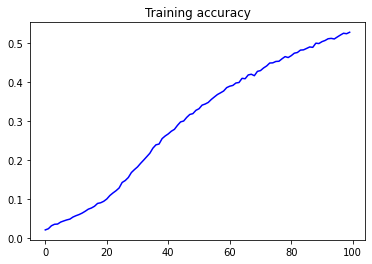

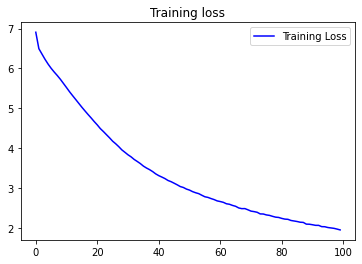

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope virtue and thy way end new find true chase thee torn forth forth think to forth groan truth fire fire night night heaven lust sad tomb strange weeds wide defaced plot plot burn heart heart heart forth forth go dear rich greater force cover stand cover cover forth none grow truth heart forth life shall lie of the world hath so know so be twain swear lie of the world to nothing bring men swerving find open force cover forth forth lie with him to him so tell the heart that some lie so so she temperate thy friend had
